RNN LSTM Predrection of Anomolies

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Load the dataset
df = pd.read_csv("clean_data.csv", parse_dates=["starttime", "stoptime"])
df.head()

,ID,tripduration,starttime,stoptime,ss_id,ss_name,ss_latitude,ss_longitude,es_id,es_name,es_latitude,es_longitude,bikeid,usertype,birth year,gender
0,0,695,2013-06-01 00:00:00,2013-06-01 00:11:00,444,Broadway & W 24 St,40.742354,-73.989151,434,9 Ave & W 18 St,40.743174,-74.003664,19678,Subscriber,1983,1
1,1,693,2013-06-01 00:00:00,2013-06-01 00:11:00,444,Broadway & W 24 St,40.742354,-73.989151,434,9 Ave & W 18 St,40.743174,-74.003664,16649,Subscriber,1984,1
2,2,2059,2013-06-01 00:00:00,2013-06-01 00:35:00,406,Hicks St & Montague St,40.695128,-73.995951,406,Hicks St & Montague St,40.695128,-73.995951,19599,Customer,0,0
3,3,123,2013-06-01 00:01:00,2013-06-01 00:03:00,475,E 15 St & Irving Pl,40.735243,-73.987586,262,Washington Park,40.691782,-73.973730,16352,Subscriber,1960,1
4,4,1521,2013-06-01 00:01:00,2013-06-01 00:26:00,2008,Little West St & 1 Pl,40.705693,-74.016777,310,State St & Smith St,40.689269,-73.989129,15567,Subscriber,1983,1


In [3]:
df.head()

,ID,tripduration,stoptime,ss_id,ss_name,ss_latitude,ss_longitude,es_id,es_name,es_latitude,es_longitude,bikeid,usertype,birth year,gender
starttime,,,,,,,,,,,,,,,
2013-06-01 00:00:00,0,695,2013-06-01 00:11:00,444,Broadway & W 24 St,40.742354,-73.989151,434,9 Ave & W 18 St,40.743174,-74.003664,19678,Subscriber,1983,1
2013-06-01 00:00:00,1,693,2013-06-01 00:11:00,444,Broadway & W 24 St,40.742354,-73.989151,434,9 Ave & W 18 St,40.743174,-74.003664,16649,Subscriber,1984,1
2013-06-01 00:00:00,2,2059,2013-06-01 00:35:00,406,Hicks St & Montague St,40.695128,-73.995951,406,Hicks St & Montague St,40.695128,-73.995951,19599,Customer,0,0
2013-06-01 00:01:00,3,123,2013-06-01 00:03:00,475,E 15 St & Irving Pl,40.735243,-73.987586,262,Washington Park,40.691782,-73.973730,16352,Subscriber,1960,1
2013-06-01 00:01:00,4,1521,2013-06-01 00:26:00,2008,Little West St & 1 Pl,40.705693,-74.016777,310,State St & Smith St,40.689269,-73.989129,15567,Subscriber,1983,1


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577703 entries, 0 to 577702
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   ID            577703 non-null  int64         
 1   tripduration  577703 non-null  int64         
 2   starttime     577703 non-null  datetime64[ns]
 3   stoptime      577703 non-null  datetime64[ns]
 4   ss_id         577703 non-null  int64         
 5   ss_name       577703 non-null  object        
 6   ss_latitude   577703 non-null  float64       
 7   ss_longitude  577703 non-null  float64       
 8   es_id         577703 non-null  int64         
 9   es_name       577703 non-null  object        
 10  es_latitude   577703 non-null  float64       
 11  es_longitude  577703 non-null  float64       
 12  bikeid        577703 non-null  int64         
 13  usertype      577703 non-null  object        
 14  birth year    577703 non-null  int64         
 15  gender        577

Using LSTM RNN 

In [26]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

# Load the bike trip data from CSV file
df = pd.read_csv("clean_data.csv")

# Preprocess the data
# Drop irrelevant columns
df = df.drop(['ID', 'bikeid', 'usertype', 'birth year', 'gender'], axis=1)
# Convert datetime columns to datetime format
df['starttime'] = pd.to_datetime(df['starttime'])
df['stoptime'] = pd.to_datetime(df['stoptime'])
# Set the index to the starttime column
df = df.set_index('starttime')
# Aggregate the data by hour and station
df = df.resample('H').agg({'tripduration': 'count', 'ss_id': 'nunique', 'es_id': 'nunique'})
# Normalize the data using MinMaxScaler
scaler = MinMaxScaler()
df_norm = scaler.fit_transform(df)

# Split the data into training and testing sets
train_size = int(len(df_norm) * 0.8)
test_size = len(df_norm) - train_size
train_data, test_data = df_norm[0:train_size,:], df_norm[train_size:len(df_norm),:]

# Create the input and output sequences for the RNN
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data)-seq_length-1):
        X.append(data[i:(i+seq_length), :])
        y.append(data[i+seq_length, 0])
    return np.array(X), np.array(y)

seq_length = 24 # number of hours in a day
train_X, train_y = create_sequences(train_data, seq_length)
test_X, test_y = create_sequences(test_data, seq_length)

# Build the RNN model
model = Sequential()
model.add(LSTM(units=64, input_shape=(train_X.shape[1], train_X.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=32, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=16))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
history = model.fit(train_X, train_y, epochs=70, batch_size=64, validation_split=0.1, verbose=1)

# Evaluate the model on the test set
score = model.evaluate(test_X, test_y, verbose=0)
print('Test loss:', score)

# Use the model to detect anomalies in the test set
y_pred = model.predict(test_X)
mse = np.mean(np.power(test_y - y_pred, 2), axis=1)
threshold = np.percentile(mse, 95) # set the threshold for anomalies to the 95th percentile of the mean squared error
anomalies = np.where(mse > threshold)[0]

# Print the indices of the anomalies
print('Anomalies:', anomalies)


Epoch 1/70
8/8 [==============================] - 16s 454ms/step - loss: 0.0600 - val_loss: 0.0979
Epoch 2/70
8/8 [==============================] - 1s 62ms/step - loss: 0.0512 - val_loss: 0.1179
Epoch 3/70
8/8 [==============================] - 0s 60ms/step - loss: 0.0481 - val_loss: 0.0982
Epoch 4/70
8/8 [==============================] - 0s 62ms/step - loss: 0.0458 - val_loss: 0.1044
Epoch 5/70
8/8 [==============================] - 1s 64ms/step - loss: 0.0440 - val_loss: 0.0994
Epoch 6/70
8/8 [==============================] - 1s 63ms/step - loss: 0.0418 - val_loss: 0.0927
Epoch 7/70
8/8 [==============================] - 0s 62ms/step - loss: 0.0388 - val_loss: 0.0817
Epoch 8/70
8/8 [==============================] - 0s 57ms/step - loss: 0.0338 - val_loss: 0.0576
Epoch 9/70
8/8 [==============================] - 0s 60ms/step - loss: 0.0311 - val_loss: 0.0457
Epoch 10/70
8/8 [==============================] - 0s 59ms/step - loss: 0.0247 - val_loss: 0.0408
Epoch 11/70
8/8 [==========

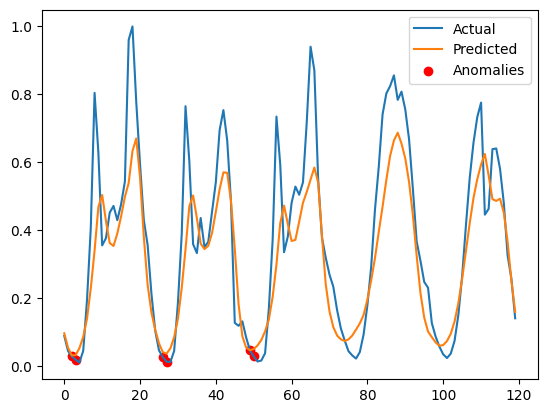

In [27]:
import matplotlib.pyplot as plt

# Plot the actual and predicted values
plt.plot(test_y, label='Actual')
plt.plot(y_pred, label='Predicted')

# Highlight the anomalies
plt.scatter(anomalies, test_y[anomalies], color='r', label='Anomalies')

plt.legend()
plt.show()


In [33]:
# Get the timestamps of the test set
test_times = df.index[train_size+seq_length+1:]

# Get the indices of the anomalies
anomalies = np.where(mse > threshold)[0]

# Get the timestamps of the anomalies
anomaly_times = test_times[anomalies]

# Print the timestamps of the anomalies
print('Anomaly times:', anomaly_times)


Anomaly times: DatetimeIndex(['2013-06-26 03:00:00', '2013-06-26 04:00:00',
               '2013-06-27 03:00:00', '2013-06-27 04:00:00',
               '2013-06-28 02:00:00', '2013-06-28 03:00:00'],
              dtype='datetime64[ns]', name='starttime', freq=None)


Reference:


https://towardsdatascience.com/time-series-of-price-anomaly-detection-with-lstm-11a12ba4f6d9
https://github.com/chickenbestlover/RNN-Time-series-Anomaly-Detection

https://faroit.com/keras-docs/0.3.3/models/#using-the-sequential-model